# DATA SCIENCE & BUSINESS ANALYTICS INTERN @ COMPOZENT

### AUTHOR : PARVEJ ALAM M. ANSARI

## Basic_Task_2: 
## Naive Bayes: Develop a program that can classify data based on the probability of an event occurring.

### The dataset is available at Kaggle : 
### https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

## 1. Import required libraries

In [1]:
# Numerical libraries
import numpy as np

# To handle data in form of rows and columns 
import pandas as pd

# Importing seaborn for statistical plots
import seaborn as sns
sns.set(color_codes=True)

# Importing ploting libraries
import matplotlib.pyplot as plt

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# For normalization
from sklearn.preprocessing import StandardScaler

# Import the library for handling the imbalance dataset
from imblearn.over_sampling import SMOTE

# Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

# Import Naive Bayes machine learning library
from sklearn.naive_bayes import GaussianNB

# Import the metrics
from sklearn import metrics

In [2]:
# Load Dataset
diabetes_data = pd.read_csv('diabetes.csv')

## 2. Overview of data

In [3]:
# Check top few records to get a feel of the data structure
diabetes_data.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


* It shows that there are eight independent variables (Preg, Plas, Pres, skin, test, mass, pedi, age) and one dependent variable (class).

In [4]:
# Check last few records to get a feel of the data structure
diabetes_data.tail()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
# To show the detailed summary:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* It shows the number of rows, number of columns, data types information, Memory usage, number of null values in each column.

In [6]:
# Lets analysze the distribution of the dependent column
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
# To get the shape of the dataset
diabetes_data.shape

(768, 9)

## 3. Handling Missing Values

In [8]:
# To check the missing values in the dataset
diabetes_data.isnull().values.any()

False

* It shows that there are no null values (missing values) in the dataset. But, it does not make sense. It seems very likely that zero values encode missing data.We replace 0 by NaN values to count the missing values.
 

In [9]:
#Replace 0 to NaN
d = diabetes_data[['Plas','Pres','skin','test','mass']]=diabetes_data[['Plas','Pres','skin','test','mass']].replace(0,np.nan)
d.head()

,Plas,Pres,skin,test,mass
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1


In [10]:
# Find the number of Missing values
d.isnull().sum()[['Plas','Pres','skin','test','mass']]

Plas      5
Pres     35
skin    227
test    374
mass     11
dtype: int64

### Handling the Missing values by replacing NaN to median

In [11]:
# Replace NaN to mean value to explore dataset
diabetes_data['Plas'].fillna(diabetes_data['Plas'].median(),inplace=True)
diabetes_data['Pres'].fillna(diabetes_data['Pres'].median(),inplace=True)
diabetes_data['skin'].fillna(diabetes_data['skin'].median(),inplace=True)
diabetes_data['test'].fillna(diabetes_data['test'].median(),inplace=True)
diabetes_data['mass'].fillna(diabetes_data['mass'].median(),inplace=True)

diabetes_data.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## 4.Exploratory Data Analysis

In [12]:
# Analysing the class
diabetes_data.groupby('class').size()

class
0    500
1    268
dtype: int64

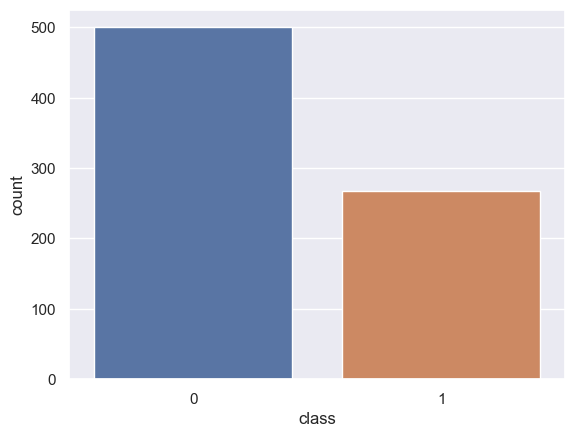

In [13]:
# countplot----Plot the frequency of the class

# It shows the count of observations in each categorical bin using bars
sns.countplot(data=diabetes_data, x='class')
plt.show()

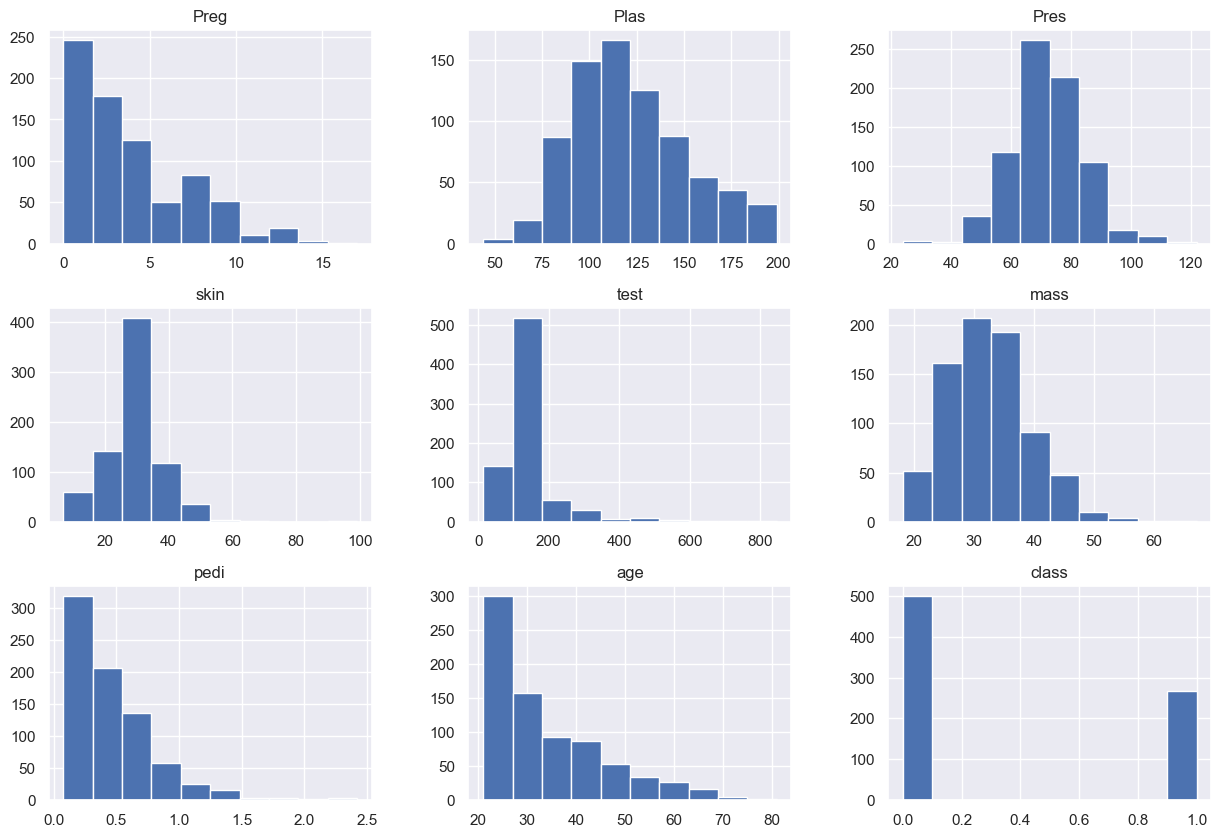

In [14]:
# Histogram 
diabetes_data.hist(figsize=(15,10))
plt.show()

/tmp/ipykernel_32172/748341944.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_data['Preg'],ax=ax2[0][0])
/tmp/ipykernel_32172/748341944.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes_data['Plas'],ax=ax2[0][1])
/tmp/ipykernel_32172/748341944.py:5: UserWarning: 

`distp

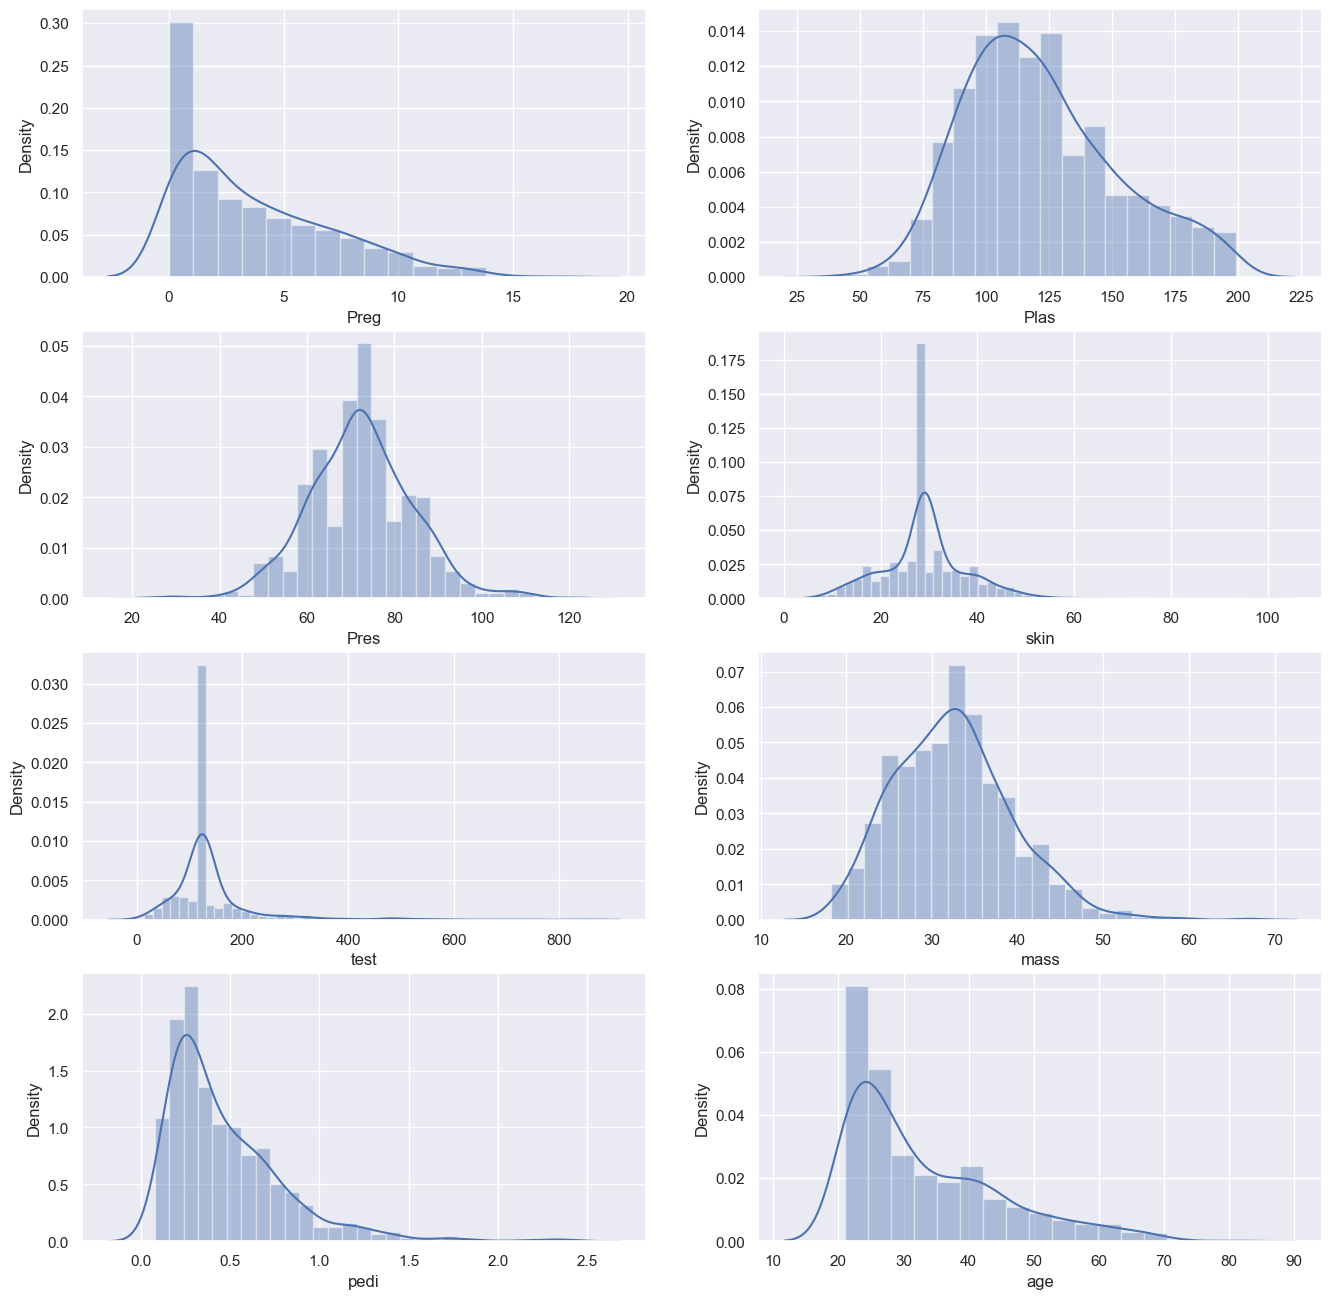

In [15]:
# Distplot
fig, ax2 = plt.subplots(4, 2, figsize=(16, 16))
sns.distplot(diabetes_data['Preg'],ax=ax2[0][0])
sns.distplot(diabetes_data['Plas'],ax=ax2[0][1])
sns.distplot(diabetes_data['Pres'],ax=ax2[1][0])
sns.distplot(diabetes_data['skin'],ax=ax2[1][1])
sns.distplot(diabetes_data['test'],ax=ax2[2][0])
sns.distplot(diabetes_data['mass'],ax=ax2[2][1])
sns.distplot(diabetes_data['pedi'],ax=ax2[3][0])
sns.distplot(diabetes_data['age'],ax=ax2[3][1])
plt.show()

* The plots show that Plas, Pres, mass are normally distributed. Preg, test, age, pedi are rightly skewed.

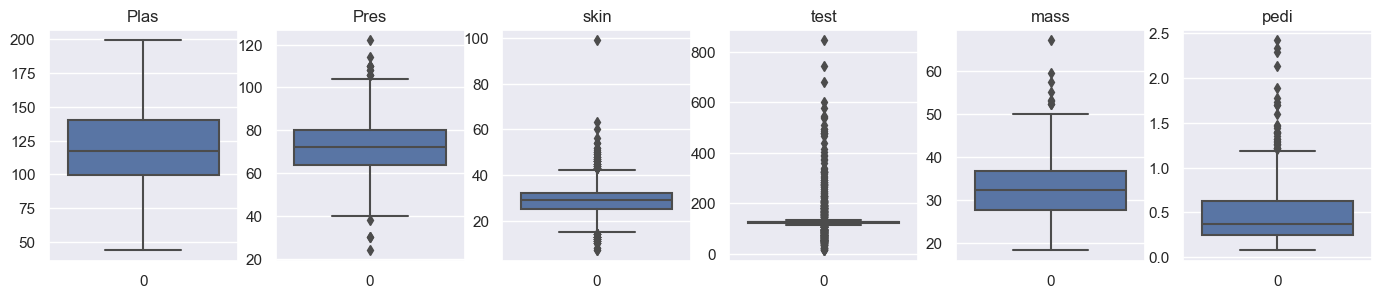

In [16]:
# boxplot
fig = plt.figure(figsize=(20,3))

for i in np.arange(1,7):
    data3=plt.subplot(1,7,i,title=diabetes_data.columns[i])
    sns.boxplot(diabetes_data[diabetes_data.columns[i]])
plt.show()

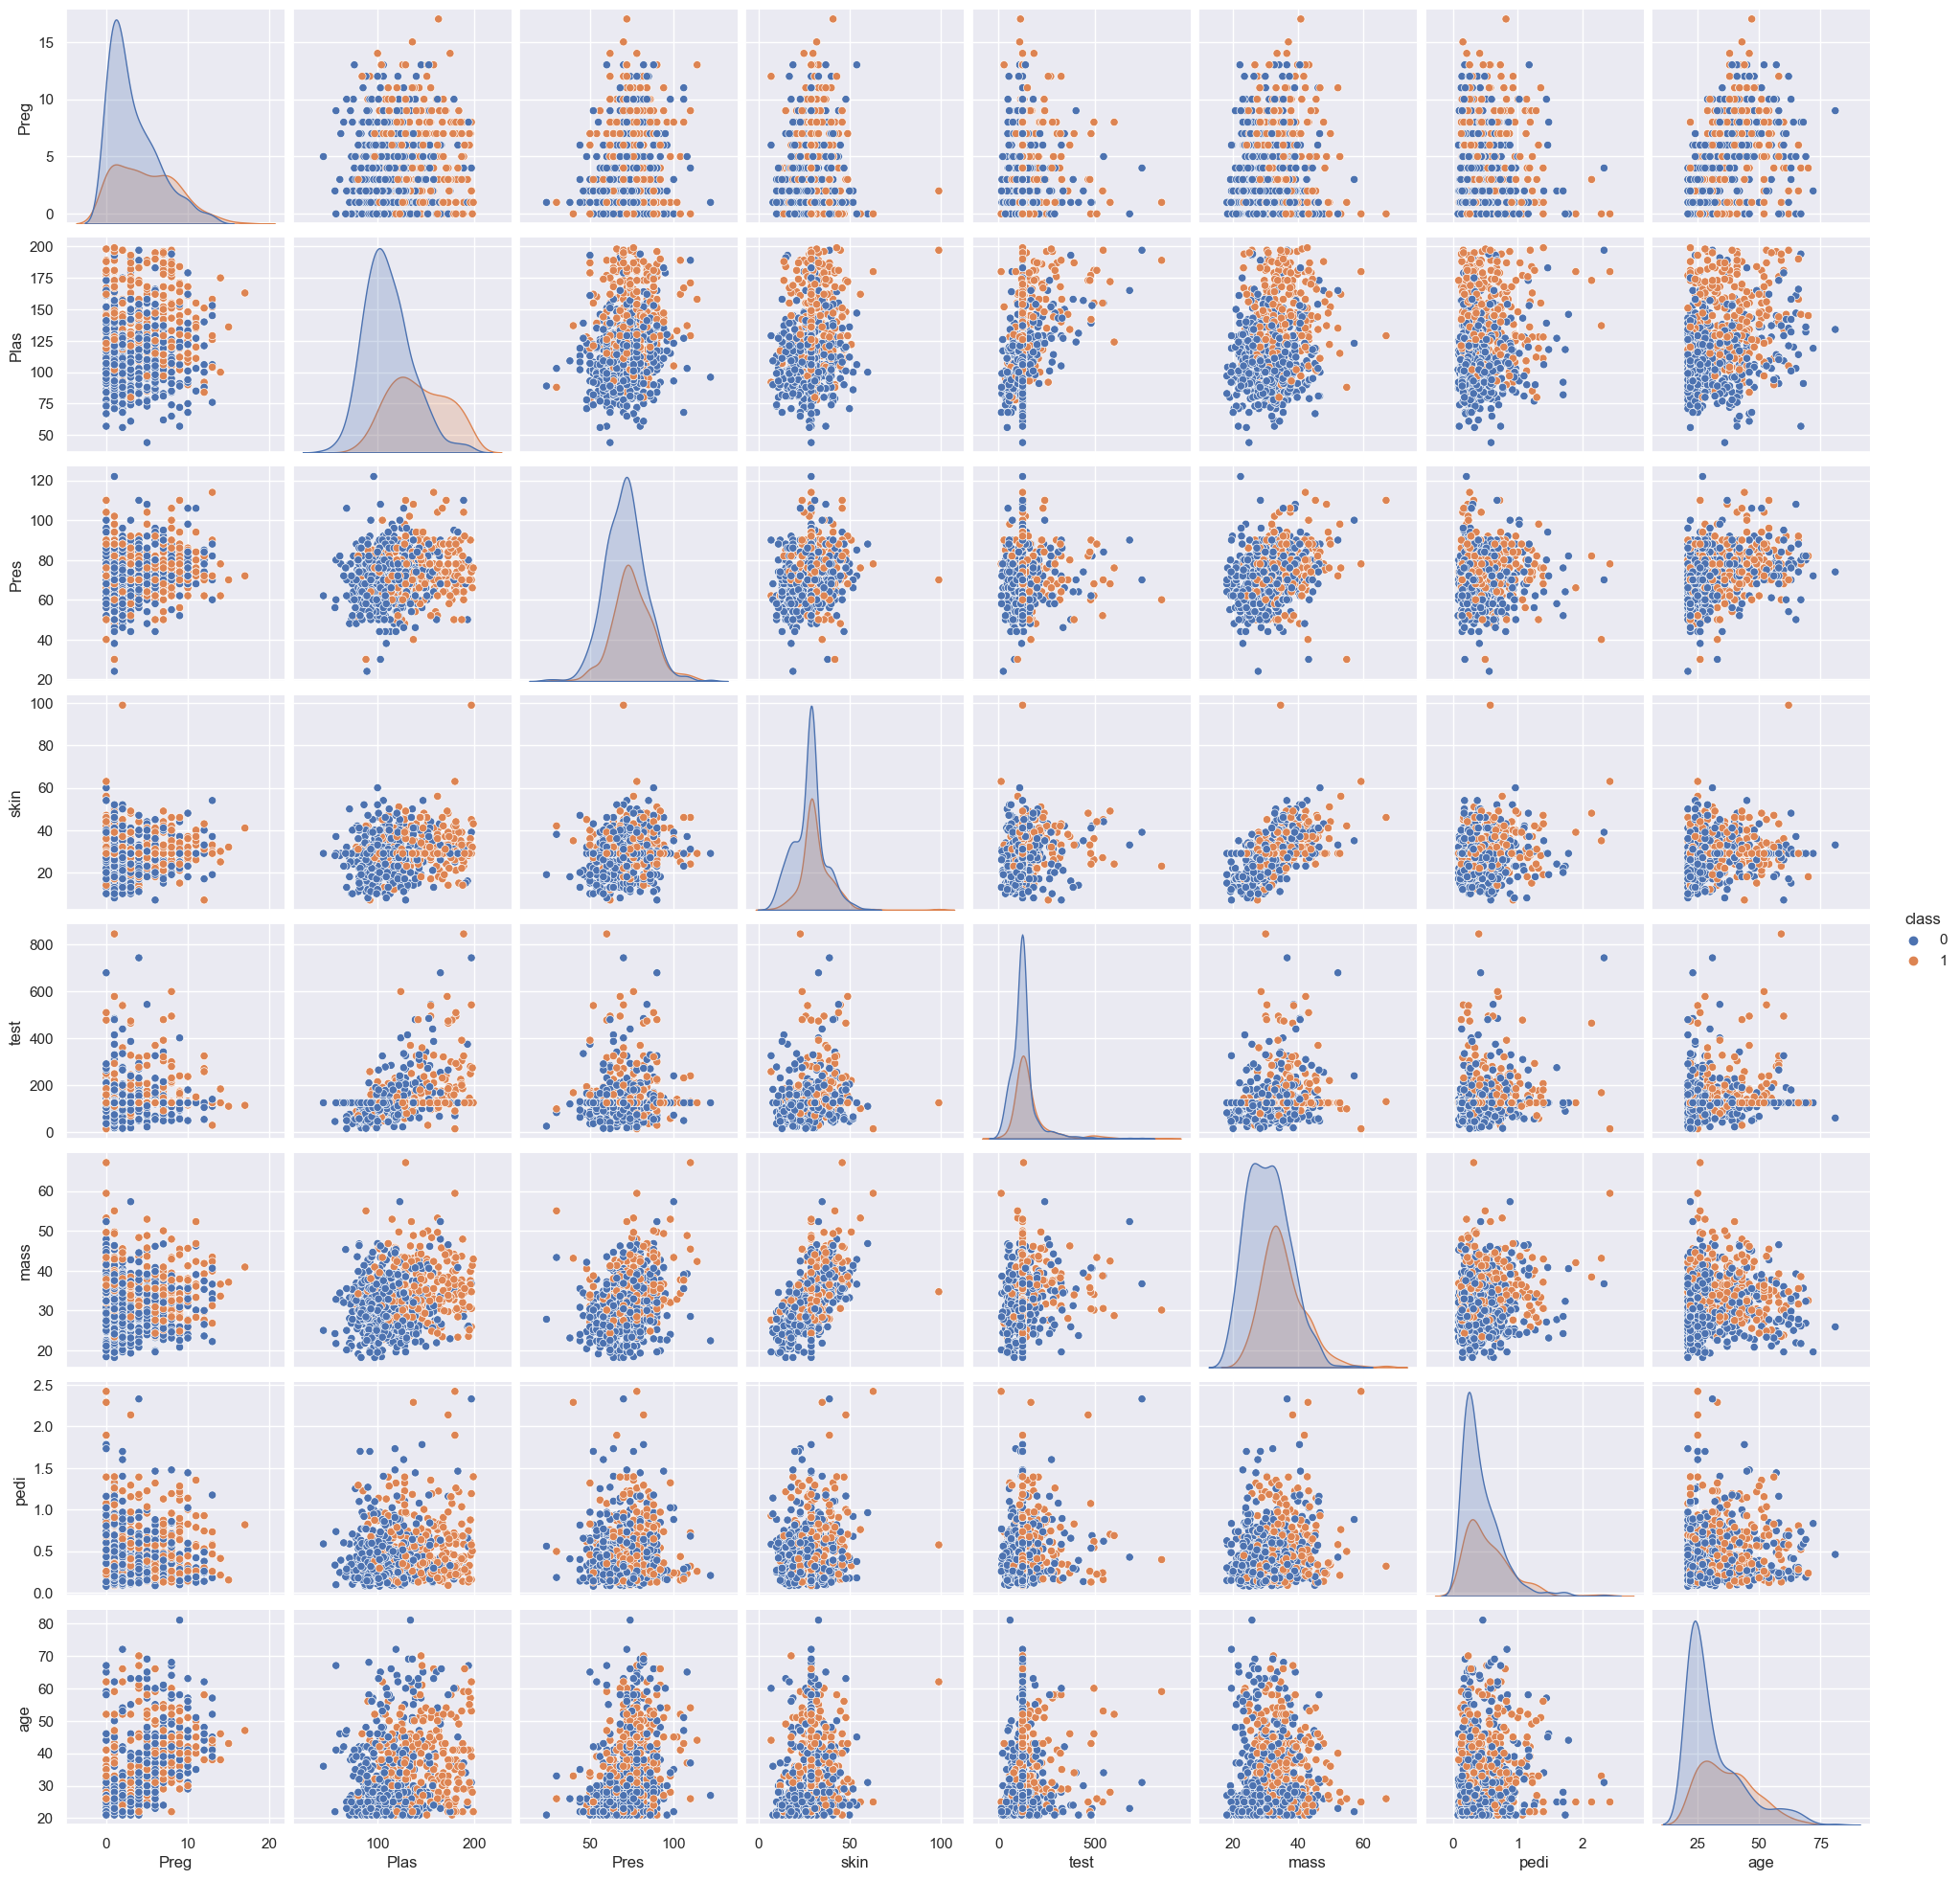

In [17]:
# pairplot--Multiple relationship of scatterplot
sns.pairplot(diabetes_data,hue='class')
plt.show()

The plot shows that there is some relationship between parameters. class is added as hue. We see that blue and orange dots are overlap. 

In [18]:
# corrlation matrix 
cor = diabetes_data.corr()
cor

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Plas,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
Pres,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
skin,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
test,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
mass,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
pedi,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
class,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


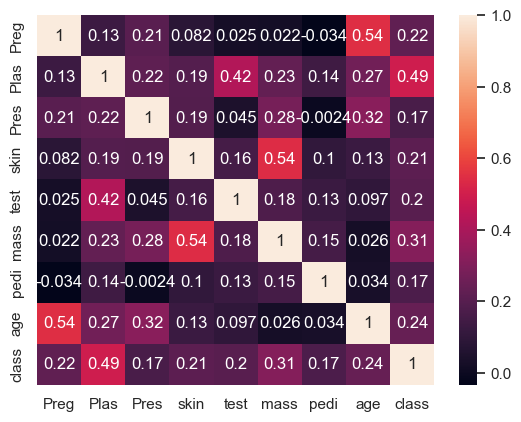

In [19]:
# correlation plot---heatmap
sns.heatmap(cor,annot=True)
plt.show()

### Encoding the age

In [20]:
# Age has dispersion so divide into bucket
def age(df):
    df.loc[(df['age'] > 20) & (df['age'] <= 41), 'age'] = 1
    df.loc[(df['age'] > 42) & (df['age'] <= 61), 'age'] = 2
    df.loc[(df['age'] > 62) & (df['age'] <= 81), 'age'] = 3       
    return df

age(diabetes_data);

## 5. Model Building

### Splitting the dataset

In [21]:
X = diabetes_data.loc[:,diabetes_data.columns!='class']
y = diabetes_data.loc[:,diabetes_data.columns=='class']

In [22]:
# Split X and y into training and test set in 70:30 ratio
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
columns = X_train.columns

### Normalizing

In [23]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

###  Managing the imbalance class 

In [24]:
Ov_sampling = SMOTE(random_state=0)
ov_data_X, ov_data_y = Ov_sampling.fit_resample(X_train, y_train)

ov_data_X = pd.DataFrame(data=ov_data_X, columns=columns)
ov_data_y = pd.DataFrame(ov_data_y, columns=['class'])

In [25]:
print('length of oversampled data is   ',len(ov_data_X))
print('Number of no subscription in oversampled data ' ,len(ov_data_y[ov_data_y['class']==0]))
print('Number of subscription ' ,len(ov_data_y[ov_data_y['class']==1]))
print('Proportion of no subscription data in oversampled data is ' ,len(ov_data_y[ov_data_y['class']==0])/len(ov_data_X))
print('Proportion of subscription data in oversampled data is ' ,len(ov_data_y[ov_data_y['class']==1])/len(ov_data_X))

length of oversampled data is    686
Number of no subscription in oversampled data  343
Number of subscription  343
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [26]:
ov_data_y['class'].value_counts()

1    343
0    343
Name: class, dtype: int64

##  Naive Bayes Model

In [27]:
# Invoke the Gaussian function and find the bestfit model on training data
model = GaussianNB()
model.fit(ov_data_X,ov_data_y)
pred = model.predict(X_test)

/home/ali/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ali/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [28]:
# Making some predictions using Test dataset:
pred_check = model.predict(X_test[0:10])
for i in pred_check:
    if i == 1:
        print("Patient is Diabetic.")
    else:
        print("Patient is not Diabetic.")

Patient is Diabetic.
Patient is not Diabetic.
Patient is not Diabetic.
Patient is Diabetic.
Patient is not Diabetic.
Patient is not Diabetic.
Patient is Diabetic.
Patient is Diabetic.
Patient is Diabetic.
Patient is not Diabetic.


/home/ali/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


### Evaluate model performance

In [29]:
model_score = model.score(X_test, y_test)
print('Model score :',model_score)
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test,pred))

Model score : 0.7575757575757576
Confusion Matrix:
 [[132  25]
 [ 31  43]]


/home/ali/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


###  Measure performance of Naive Bayes Classification

In [30]:
print('Accuracy :',metrics.accuracy_score(y_test,pred))
print('Precision :',metrics.precision_score(y_test,pred))
print('Recall :',metrics.recall_score(y_test,pred))
print('F-score :',metrics.f1_score(y_test,pred))

Accuracy : 0.7575757575757576
Precision : 0.6323529411764706
Recall : 0.581081081081081
F-score : 0.6056338028169013


In [31]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       157
           1       0.63      0.58      0.61        74

    accuracy                           0.76       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231



The Accuracy of the Naive Bayes Model is not very much improved because in Naive Bayes we assume that attributes are independent to each other but in real context they are not completely independent to each other.Some relation exists between them. 

<p style="background-color:#F1C40F;color:black;font-size:22px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid #F1C40F;">Thank you😄!!!!!!</p>